#**1- Time Series Forecasting**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# Load and read the dataset. Fix the index
BakerySales_df = pd.read_csv('Bakery Sales_Modified_With Sum.csv')
BakerySales_df['datetime'] = pd.to_datetime(BakerySales_df['datetime'])
BakerySales_df.set_index('datetime', inplace=True)

In [ ]:
#clean data to remove all empty values
BakerySales_df=BakerySales_df[:2420]

In [ ]:
# Sum the data of each day
daily_sales = BakerySales_df.resample("D").sum()

In [ ]:
#min index function
def minIndex(L):
  m = L[2] #start from 2 because (see later) inde 0 and 1 f Lmad is 0, useless
  mi = 2
  for i in range (2,len(L)):
    if L[i] < m:
      m = L[i]
      mi = i
  return mi

In [ ]:

#list of all items
Items = list(daily_sales.columns)[1:]
Items.remove("Unnamed: 23")

#80% 20% of training to testing data, in order to find optimal seasonality period
training = daily_sales[:237]
testing = daily_sales[237:]

minIndexForecastItem = {}

for item in Items:
  Lmad = [0]*(118+1)

  for i in range (2, 119):
    Pl = i #period length

    forecast_model = ExponentialSmoothing(training[item], trend = None, seasonal='add', seasonal_periods=Pl).fit()
    forecast_values = forecast_model.predict(start="2020-03-04", end="2020-05-02") #testing dates

    Lforc = list(forecast_values)
    Ltest = list(testing[item])

    #compare accuracy of forecast values to testing data
    Lerror = [abs(Lforc[j] - Ltest[j]) for j in range (len(Lforc))] #MAD
    Lmad[i] = np.mean(Lerror)  #MAD

  m = minIndex(Lmad) #minimum MAD period
  (x, y) = (m, Lmad[m]) #x minimum MAD period, y MAD value for minimum MAD period
  minIndexForecastItem[item] = (x, y) #store in dictionary

print(minIndexForecastItem)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:1412: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:1419: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)


{'chocolate chip cookie': (63, 4.800660347187381), 'plain bread': (21, 2.1522093668816855), 'jam': (28, 0.7085646853685293), 'iced coffee': (5, 1.348700276943558), 'croissant': (21, 1.9590902849504601), 'iced coffee latte': (7, 0.6915193634594601), 'chocolate croissant': (35, 1.467257699049322), 'brownie ': (7, 1.1381202705761864), 'lemon cake': (112, 1.4300298258736595), 'chocolate cake ': (91, 0.6056155981100506), 'cofffee cake ': (2, 0.0), 'strawberry tart': (2, 0.0), 'chocolate mousse': (83, 0.4944474108541431), 'plain cheese cake': (35, 0.7435620037379845), 'chocolate cheesecake ': (14, 1.0531274738031369), 'orange pound cake': (66, 0.6698144919872219), 'cinnamon roll ': (99, 0.1750035291918777), 'chocolate macaroon': (9, 1.3646485843079261), 'apple pie ': (35, 1.0536963704778368), 'tiramisu': (113, 0.8091749049242202), 'chcocolate éclair ': (92, 0.2638899854264633), 'Desserts sum': (63, 12.926000319926963), 'Drinks sum': (70, 1.8283213788320876)}


In [ ]:
print(minIndexForecastItem)

{'chocolate chip cookie': (63, 4.800660347187381), 'plain bread': (21, 2.1522093668816855), 'jam': (28, 0.7085646853685293), 'iced coffee': (5, 1.348700276943558), 'croissant': (21, 1.9590902849504601), 'iced coffee latte': (7, 0.6915193634594601), 'chocolate croissant': (35, 1.467257699049322), 'brownie ': (7, 1.1381202705761864), 'lemon cake': (112, 1.4300298258736595), 'chocolate cake ': (91, 0.6056155981100506), 'cofffee cake ': (2, 0.0), 'strawberry tart': (2, 0.0), 'chocolate mousse': (83, 0.4944474108541431), 'plain cheese cake': (35, 0.7435620037379845), 'chocolate cheesecake ': (14, 1.0531274738031369), 'orange pound cake': (66, 0.6698144919872219), 'cinnamon roll ': (99, 0.1750035291918777), 'chocolate macaroon': (9, 1.3646485843079261), 'apple pie ': (35, 1.0536963704778368), 'tiramisu': (113, 0.8091749049242202), 'chcocolate éclair ': (92, 0.2638899854264633), 'Desserts sum': (63, 12.926000319926963), 'Drinks sum': (70, 1.8283213788320876)}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:1412: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:1419: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:1412: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:1419: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)


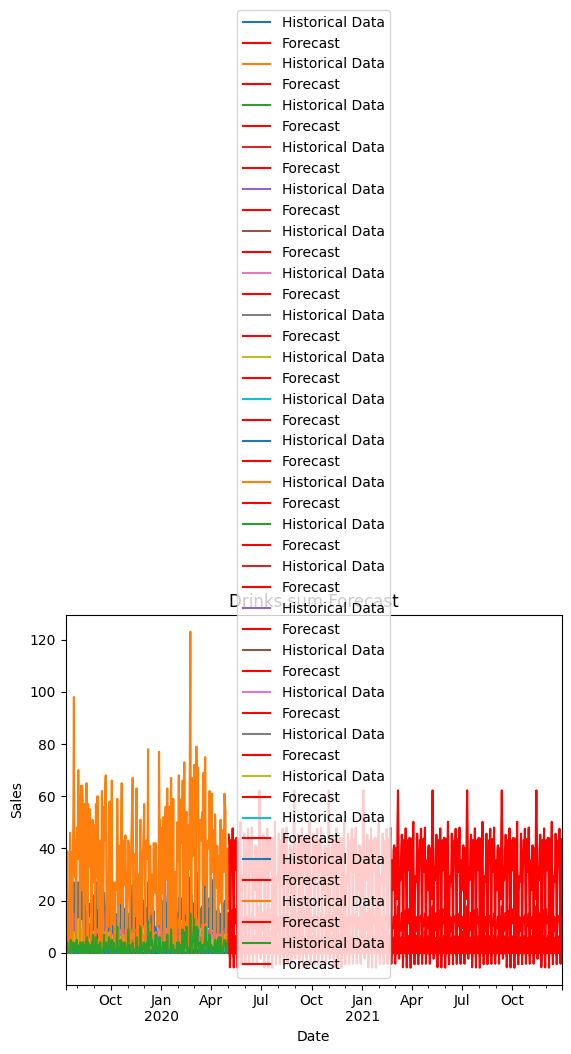

In [ ]:
figureNumber = 1
for key in minIndexForecastItem:
    item = key
    (m, Em) = minIndexForecastItem[key]

    plt.figure(figureNumber)
    i += 1

    forecast_model = ExponentialSmoothing(daily_sales[item], trend = None, seasonal='add', seasonal_periods=m).fit()
    forecast_values = forecast_model.predict(start="2020-05-03", end="2021-12-30")

    daily_sales[item].plot(legend = True, label = "Historical Data")
    forecast_values.plot(legend=True, label='Forecast', color='red')

    plt.title(item+" Forecast")
    plt.xlabel('Date')
    plt.ylabel('Sales')

plt.legend()
plt.show()

In [ ]:
class datetime (object):

    def __init__(self, y, m, d):
        self.y = y
        self.m = m
        self.d = d

    def incr (self):
        D = {"1":"31", "2":"28", "3":"31", "4":"30", "5":"31", "6":"30", "7":"31", "8":"31", "9":"30", "10":"31", "11": "30", "12":"31"}
        if self.y %4 == 0:
            D["02"] = "29"

        if self.d < int(D[str(self.m)]):
            self.d += 1
        elif self.d == int(D[str(self.m)]) and self.m < 12:
            self.m += 1
            self.d = 1
        elif self.d == int(D[str(self.m)]) and self.m == 12:
            self.y += 1
            self.m = 1
            self.d = 1

    def __str__(self):

        sy = str(self.y)
        sm = str(self.m)
        if len(sm) == 1:
            sm = "0" + sm
        sd = str(self.d)
        if len(sd) == 1:
            sd = "0" + sd
        return sy +"-" + sm + "-" + sd




D = {}
Ldate = []
DT = datetime(2020,5,3)
while str(DT) != "2022-01-01":
    Ldate.append(str(DT))
    DT.incr()

D["datetime"] = Ldate

for key in minIndexForecastItem:
    item = key
    (m, Em) = minIndexForecastItem[key]

    forecast_model = ExponentialSmoothing(daily_sales[item], trend = None, seasonal='add', seasonal_periods=m).fit()
    forecast_values = forecast_model.predict(start="2020-05-03", end="2021-12-31")

    D[item] = list(forecast_values)

NH = open("forecastV.csv", 'w')

s = ""
for key in D:
    s += key + ","
NH.write(s[:-1])

NH.write("\n")
for i in range (len(Ldate)):
    s = ""
    for key in D:
        s += str(D[key][i]) + ","
    NH.write(s[:-1])
    NH.write("\n")
NH.close()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:1412: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:1419: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)


In [ ]:
NH = open("forecastV.csv", 'w')

s = ""
for key in D:
    s += key + ","
NH.write(s[:-1])

NH.write("\n")
for i in range (len(Ldate)):
    s = ""
    for key in D:
        s += str(D[key][i]) + ","
    NH.write(s[:-1])
    NH.write("\n")
NH.close()

In [ ]:
Forecast_df = pd.read_csv('forecastV.csv')
Forecast_df['datetime'] = pd.to_datetime(Forecast_df['datetime'])
Forecast_df.set_index('datetime', inplace=True)

#cleaning forecast to remove negative values and round non integers
Items = list(Forecast_df.columns)
for item in Items:
  for i in range (len(Forecast_df[item])):
    #removing negatives
    if Forecast_df[item][i] < 0:
      Forecast_df[item][i] = 0

    Forecast_df[item][i] = round(Forecast_df[item][i])

from copy import deepcopy
FC_cleaned = deepcopy(Forecast_df) #deepcopy to avoid accidental changes in data because of alias
FC_cleaned.to_csv("FC_cleaned.csv")

In [ ]:
FC_cleaned.head()

,chocolate chip cookie,plain bread,jam,iced coffee,croissant,iced coffee latte,chocolate croissant,brownie,lemon cake,chocolate cake,...,plain cheese cake,chocolate cheesecake,orange pound cake,cinnamon roll,chocolate macaroon,apple pie,tiramisu,chcocolate éclair,Desserts sum,Drinks sum
datetime,,,,,,,,,,,,,,,,,,,,,
2020-05-03,15.0,6.0,2.0,2.0,3.0,1.0,6.0,3.0,6.0,1.0,...,2.0,2.0,1.0,0.0,2.0,2.0,0.0,0.0,45.0,6.0
2020-05-04,11.0,3.0,1.0,2.0,3.0,1.0,4.0,2.0,4.0,1.0,...,1.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,41.0,3.0
2020-05-05,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
2020-05-06,2.0,3.0,1.0,2.0,3.0,1.0,4.0,2.0,4.0,2.0,...,2.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,4.0,3.0
2020-05-07,16.0,4.0,1.0,1.0,3.0,1.0,5.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,43.0,1.0


#**2- Aggregate Planning**

In [ ]:
MonthlyDemand_df = FC_cleaned.resample('M').sum()
MonthlyDemand_df.to_csv("MonthlyDemandFC.csv")

In [ ]:
df = pd.read_csv('DemandDPDMonthly.csv', index_col = 'datetime')


In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 28.0 MB/s eta 0:00:00


In [ ]:
# Lets start with the Linear Program by defining the parameters
import pulp as pl

D_pastries = list(df['Pastries'])
D_drinks = list(df['Drinks'])
D_delivery = list(df['Delivery'])
hiring = 750000 # Cost of hiring one worker
K_pastries = 30
K_drinks = 40
K_delivery = 20
n = 30
T = 20

In [ ]:
# Decision Variables
W_pastries = pl.LpVariable.dicts('W_pas', range(0,T), lowBound = 0)#, cat = "Integer")
W_drinks = pl.LpVariable.dicts('W_drinks', range(0,T), lowBound = 0)#, cat = "Integer")
W_delivery = pl.LpVariable.dicts('W_delivery', range(0,T), lowBound = 0)#, cat = "Integer")
P_pastries = pl.LpVariable.dicts('P_pastries', range(0,T), lowBound =0)
P_drinks = pl.LpVariable.dicts('P_drinks', range(0,T), lowBound =0)
P_delivery = pl.LpVariable.dicts('P_delivery', range(0,T), lowBound =0)


In [ ]:
# Define the Model
model = pl.LpProblem('Aggregate Planning', pl.LpMinimize)

# Objective Function
model += hiring*pl.lpSum(W_pastries[t] for t in range(0,T)) + hiring*pl.lpSum(W_drinks[t] for t in range(0,T)) + hiring*pl.lpSum(W_delivery[t] for t in range(0,T))

# Constraints
for t in range(0,T):
  model += P_pastries[t] == K_pastries*n*W_pastries[t]
  model += P_drinks[t] == K_drinks*n*W_drinks[t]
  model += P_delivery[t] == K_delivery*n*W_delivery[t]
  model += P_pastries[t] >= D_pastries[t]
  model += P_drinks[t] >= D_drinks[t]
  model += P_delivery[t] >= D_delivery[t]



/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
#print(model)

In [ ]:
pl.LpStatus[model.status]

'Not Solved'

In [ ]:
model.solve()

1

In [ ]:
pl.LpStatus[model.status]

'Optimal'

In [ ]:
# Solve the Model
status = model.solve()
#print('Number of Workers', pl.values(model.objective))

for v in model.variables():
  print(v.name, v.varValue)

P_delivery_0 311.0
P_delivery_1 311.0
P_delivery_10 314.0
P_delivery_11 311.0
P_delivery_12 339.0
P_delivery_13 313.0
P_delivery_14 324.0
P_delivery_15 323.0
P_delivery_16 318.0
P_delivery_17 333.0
P_delivery_18 301.0
P_delivery_19 332.0
P_delivery_2 328.0
P_delivery_3 335.0
P_delivery_4 304.0
P_delivery_5 334.0
P_delivery_6 321.0
P_delivery_7 310.0
P_delivery_8 337.0
P_delivery_9 302.0
P_drinks_0 78.0
P_drinks_1 79.0
P_drinks_10 82.0
P_drinks_11 80.0
P_drinks_12 83.0
P_drinks_13 79.0
P_drinks_14 82.0
P_drinks_15 82.0
P_drinks_16 80.0
P_drinks_17 83.0
P_drinks_18 79.0
P_drinks_19 83.0
P_drinks_2 82.0
P_drinks_3 83.0
P_drinks_4 79.0
P_drinks_5 83.0
P_drinks_6 80.0
P_drinks_7 82.0
P_drinks_8 83.0
P_drinks_9 74.0
P_pastries_0 970.0
P_pastries_1 989.0
P_pastries_10 1011.0
P_pastries_11 965.0
P_pastries_12 1083.0
P_pastries_13 969.0
P_pastries_14 1041.0
P_pastries_15 1006.0
P_pastries_16 1015.0
P_pastries_17 1047.0
P_pastries_18 947.0
P_pastries_19 1048.0
P_pastries_2 1030.0
P_pastries_3 10

# **3- Optimal Order Quantity**

## **Computing the daily demand of each raw material over forecasted period**

In [ ]:
#creating a dictionary of every item with raw material requirement
RawMaterial_df = pd.read_csv('Raw Material.csv')
RawMaterial_df.set_index('Name', inplace=True)

RM_df = RawMaterial_df.transpose()

RM_dict = dict(RM_df)
for key in RM_dict:
  RM_dict[key] = list(RM_dict[key])
print(RM_dict)

{'chocolate chip cookie': [1500, 40.0, 30.0, 0.0, 0.5, 30.0, 0.0, 0.0, 'pastry'], 'plain bread': [3500, 10.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 'pastry'], 'jam': [1500, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 'pastry'], 'iced coffee': [4000, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 'drink'], 'croissant': [3500, 0.0, 0.0, 30.0, 0.5, 80.0, 0.0, 0.0, 'pastry'], 'iced coffee latte': [4500, 5.0, 0.0, 0.0, 0.0, 0.0, 0.1, 10.0, 'drink'], 'chocolate croissant': [4800, 10.0, 10.0, 30.0, 0.5, 80.0, 0.0, 0.0, 'pastry'], 'brownie ': [4000, 10.0, 15.0, 0.0, 0.5, 10.0, 0.1, 0.0, 'pastry'], 'lemon cake': [3500, 20.0, 0.0, 10.0, 0.25, 30.0, 0.0, 0.0, 'pastry'], 'chocolate cake ': [4000, 20.0, 20.0, 20.0, 0.5, 5.0, 0.0, 0.0, 'pastry'], 'cofffee cake ': [4500, 10.0, 0.0, 20.0, 0.5, 5.0, 0.0, 10.0, 'pastry'], 'strawberry tart': [4000, 20.0, 0.0, 10.0, 0.5, 20.0, 0.0, 0.0, 'pastry'], 'chocolate mousse': [4500, 15.0, 15.0, 0.0, 0.25, 0.0, 0.0, 0.0, 'pastry'], 'plain cheese cake': [5000, 20.0, 0.0, 20.0, 0.25, 35.0, 0.

In [ ]:
#Set up csv file for total raw material requirement per day during FC
Items = list(Forecast_df.columns)[:21]
RMList = list(RM_df.index)[1:-1]
Dates = list(Forecast_df.index)

SugarReqL = [0]*len(Dates)
ChocolateReqL = [0]*len(Dates)
DoughReqL = [0]*len(Dates)
EggsReqL = [0]*len(Dates)
ButterReqL = [0]*len(Dates)
MilkReqL = [0]*len(Dates)
CoffeeReqL = [0]*len(Dates)

for i in range (len(Dates)):

  dateSugarReq = 0
  dateChocolateReq = 0
  dateDoughReq = 0
  dateEggsReq = 0
  dateButterReq = 0
  dateMilkReq = 0
  dateCoffeeReq = 0

  for item in Items:

    itemDemand = FC_cleaned[item][i]

    itemSugarReq = itemDemand * RM_dict[item][1]
    itemChocolateReq = itemDemand * RM_dict[item][2]
    itemDoughReq = itemDemand * RM_dict[item][3]
    itemEggsReq = itemDemand * RM_dict[item][4]
    itemButterReq = itemDemand * RM_dict[item][5]
    itemMilkReq = itemDemand * RM_dict[item][6]
    itemCoffeeReq = itemDemand * RM_dict[item][7]

    dateSugarReq += itemSugarReq
    dateChocolateReq += itemChocolateReq
    dateDoughReq += itemDoughReq
    dateEggsReq += itemEggsReq
    dateButterReq += itemButterReq
    dateMilkReq += itemMilkReq
    dateCoffeeReq += itemCoffeeReq

  SugarReqL[i] = dateSugarReq
  ChocolateReqL[i] = dateChocolateReq
  DoughReqL[i] = dateDoughReq
  EggsReqL[i] = dateEggsReq
  ButterReqL[i] = dateButterReq
  MilkReqL[i] = dateMilkReq
  CoffeeReqL[i] = dateCoffeeReq

NH = open("RMperDate.csv", 'w')

s = "datetime"
for RMi in RMList:
  s += "," + RMi

NH.write(s + "\n")

for i in range (len(Dates)):
  s = str(Dates[i])
  s += "," + str(SugarReqL[i])
  s += "," + str(ChocolateReqL[i])
  s += "," + str(DoughReqL[i])
  s += "," + str(EggsReqL[i])
  s += "," + str(ButterReqL[i])
  s += "," + str(MilkReqL[i])
  s += "," + str(CoffeeReqL[i]) +"\n"

  NH.write(s)

NH.close()

In [ ]:
#uploading output into a dataframe to work with
RMperDate_df = pd.read_csv('RMperDate.csv')
RMperDate_df['datetime'] = pd.to_datetime(RMperDate_df['datetime'])
RMperDate_df.set_index('datetime', inplace=True)

#we now have meean demand per day of every item
print("Mean demand of sugar per day in g:", np.mean(RMperDate_df["Sugar (in g per unit)"]))

Mean demand of sugar per day in g: 692.6315789473684


In [ ]:
#In order to find optimal order quantity in a stochastic demand problem with allowed shortages, we must first find the value of penalty cost p
#This can be estimated with the loss of profit per gram/unit of raw material
#Profit = revenue - cost
#Cost of raw material is given in the file "Bakery Prices.csv"
#Revenue estimate per gram/unit of raw material must be found

#Given:
#1- Revenue per item (ex: chocolate chip cookie sells at 1500 won) sold
#2- Raw material requirement of every item sold (ex: 1 chocolate chip cookie requires 40g of Sugar, 30g of Chocolate, 0.5 Eggs, and 30g of Butter)
#Find though a weighted average the revenue allocation from item to raw material:
#Revenue allocation of sugar = weight of sugar/ total weight of all raw material
#However, must find common unit of measurement for raw material because measurement of sugar is in grams, but eggs is in units, milk is in liters
#Can establish cosr of raw material in dollar value as common measurement unit
#3 - forecasted demand of items sold
#use to get expected value of revenue allocation of raw material based on probability tha a customer buys item i

## **Estimating revenue allocation of item sale to base raw material**

In [ ]:
#Importing prices of raw material in order to introduce same unit weight for revenue allocation

RMCost_df = pd.read_csv("Bakery Price.csv")


LpricesofRM = list(RMCost_df["Price (in wons)"])
#in raw material requirement, sugar, chocolate, etc. requiremnets are lsited in grams, so convert $ from per kg to per g
for i in {0,1,2,4,6}:
  LpricesofRM[i] = LpricesofRM[i]/1000
print(LpricesofRM)


RMCostD = {"Sugar (in g per unit)": 3.948, "Chocolate (in g per unit)": 6.58, "Dough (in g per unit)": 2.632, "Eggs (in units per unit)": 658,
           "Butter (in g per unit)": 6.58, "Milk (in L per unit)": 2632, "Coffee (in g per unit)": 19.74}

[3.948, 6.58, 2.632, 658, 6.58, 2632, 19.74]


In [ ]:
RawMaterial_df.head() #Now, we have this in units grams, but need it in monetary unit

,price,Sugar (in g per unit),Chocolate (in g per unit),Dough (in g per unit),Eggs (in units per unit),Butter (in g per unit),Milk (in L per unit),Coffee (in g per unit),Category
Name,,,,,,,,,
chocolate chip cookie,1500,40.0,30.0,0.0,0.5,30.0,0.0,0.0,pastry
plain bread,3500,10.0,0.0,30.0,0.0,0.0,0.0,0.0,pastry
jam,1500,30.0,0.0,0.0,0.0,0.0,0.0,0.0,pastry
iced coffee,4000,0.0,0.0,0.0,0.0,0.0,0.0,10.0,drink
croissant,3500,0.0,0.0,30.0,0.5,80.0,0.0,0.0,pastry


In [ ]:
#multiplying number of units of each raw material used by price per unit to obtain monetary value of cost of raw material per item sold
RMinWons_df = deepcopy(RawMaterial_df)
RMList = list(RMinWons_df.columns)[1:-1]
for RMi in RMList:
  for i in range (21+1):
    RMinWons_df[RMi][i] = RMinWons_df[RMi][i] * RMCostD[RMi]


RMinWons_df.head() #now we have the respective cost of raw material per item sold which can act as weight to allocate revenue generated from sale

<ipython-input-86-441f68c407a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RMinWons_df[RMi][i] = RMinWons_df[RMi][i] * RMCostD[RMi]
<ipython-input-86-441f68c407a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RMinWons_df[RMi][i] = RMinWons_df[RMi][i] * RMCostD[RMi]
<ipython-input-86-441f68c407a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RMinWons_df[RMi][i] = RMinWons_df[RMi][i] * RMCostD[RMi]
<ipython-input-86-441f68c

,price,Sugar (in g per unit),Chocolate (in g per unit),Dough (in g per unit),Eggs (in units per unit),Butter (in g per unit),Milk (in L per unit),Coffee (in g per unit),Category
Name,,,,,,,,,
chocolate chip cookie,1500,157.92,197.4,0.00,329.0,197.4,0.0,0.0,pastry
plain bread,3500,39.48,0.0,78.96,0.0,0.0,0.0,0.0,pastry
jam,1500,118.44,0.0,0.00,0.0,0.0,0.0,0.0,pastry
iced coffee,4000,0.00,0.0,0.00,0.0,0.0,0.0,197.4,drink
croissant,3500,0.00,0.0,78.96,329.0,526.4,0.0,0.0,pastry


In [ ]:
#now that we have the respective weight of each raw material, we can calculate the revenue allocation of sold item t raw material type
#note: here we are not accouting for number of units of raw material used (to be accounted for later)
RM_RevenueAllocation_df = deepcopy(RMinWons_df).transpose()
Items = list(RM_RevenueAllocation_df.columns)[:-1]

for item in Items:
  Litem = list(RM_RevenueAllocation_df[item])
  totalWons = sum(Litem[1:-1])


  for i in range (1, 7+1):
    RM_RevenueAllocation_df[item][i] =Litem[0]*RM_RevenueAllocation_df[item][i]/totalWons
    #RM_RevenueAllocation_df[item][i] =(Litem[0]+1200)*RM_RevenueAllocation_df[item][i]/totalWons
    #this is with 1200 delivery revenues

#note that there is a delivery fee of 3000 40% of the time, so the expected delivery revenue per order is 1200 wons,
#this would be added when calculating revenue allocation, however the cost of delivery is not available to be accounted for
#so adding the delivery revenue alone would over estimate the penalty cost

In [ ]:
RM_RevenueAllocation_df.head() #Revenue allocation of sold item to raw material type

Name,chocolate chip cookie,plain bread,jam,iced coffee,croissant,iced coffee latte,chocolate croissant,brownie,lemon cake,chocolate cake,...,chocolate mousse,plain cheese cake,chocolate cheesecake,orange pound cake,cinnamon roll,chocolate macaroon,apple pie,tiramisu,chcocolate éclair,delivery fee
price,1500,3500,1500,4000,3500,4500,4800,4000,3500,4000,...,4500,5000,4500,4500,2500,4500,4500,4500,4000,3000
Sugar (in g per unit),268.656716,1166.666667,1500.0,0.0,0.0,184.931507,182.278481,198.347107,591.549296,505.263158,...,826.530612,750.0,568.421053,391.304348,789.473684,1396.551724,767.045455,380.28169,750.0,NaN
Chocolate (in g per unit),335.820896,0.0,0.0,0.0,0.0,0.0,303.797468,495.867769,0.0,842.105263,...,1377.55102,0.0,710.526316,0.0,0.0,775.862069,0.0,0.0,1071.428571,NaN
Dough (in g per unit),0.0,2333.333333,0.0,0.0,295.774648,0.0,364.556962,0.0,197.183099,336.842105,...,0.0,500.0,378.947368,521.73913,175.438596,310.344828,409.090909,0.0,214.285714,NaN
Eggs (in units per unit),559.701493,0.0,0.0,0.0,1232.394366,0.0,1518.987342,1652.892562,1232.394366,2105.263158,...,2295.918367,1562.5,1184.210526,3260.869565,1096.491228,1551.724138,2556.818182,1584.507042,892.857143,NaN


In [ ]:
#Now that we have the revenue allocation per raw material type, we can find the revenue allocation of each item per raw material gram
#This is done by dividing the previous revenue allocatino of item sold per RM type to the number of units of RM used

#RM_WeightedRevenueAllocation_D = {}
RM_RevAll_T_df = RM_RevenueAllocation_df.transpose()

Items = list(RM_RevAll_T_df.index[:21])
RML = list(RM_RevAll_T_df.columns[1:8])

for RMi in RML:
  for i in range (len(Items)):
    if RawMaterial_df[RMi][i] != 0:
      RM_RevAll_T_df[RMi][i] = (float(RM_RevAll_T_df[RMi][i])/float(RawMaterial_df[RMi][i]))
       #Revenue Allocation per RM type/ units of RM used

In [ ]:
RM_RevAll_T_df.head()

,price,Sugar (in g per unit),Chocolate (in g per unit),Dough (in g per unit),Eggs (in units per unit),Butter (in g per unit),Milk (in L per unit),Coffee (in g per unit),Category
Name,,,,,,,,,
chocolate chip cookie,1500,6.716418,11.19403,0.0,1119.402985,11.19403,0.0,0.0,pastry
plain bread,3500,116.666667,0.0,77.777778,0.0,0.0,0.0,0.0,pastry
jam,1500,50.0,0.0,0.0,0.0,0.0,0.0,0.0,pastry
iced coffee,4000,0.0,0.0,0.0,0.0,0.0,0.0,400.0,drink
croissant,3500,0.0,0.0,9.859155,2464.788732,24.647887,0.0,0.0,pastry


In [ ]:
#Now, we have for every Raw Material i, a list of different revenue allocations per unit based on the item sold
#We should now find a weighted average of the revenue allocation of each raw material, based on the demand probability of each item sold

In [ ]:
#Finding the demand probability of each item
Items = list(FC_cleaned.columns)[:21]

TotalDemandperItemD = {}
TotalDemandVal = 0

for item in Items:

  S = sum(list(FC_cleaned[item]))
  TotalDemandperItemD[item] = S
  TotalDemandVal += S


#print("TotalDemandperItemD:",TotalDemandperItemD)
#print("TotalDemandVal:", TotalDemandVal)

WeightedDemandperItemD = {}

for item in TotalDemandperItemD:
  WeightedDemandperItemD[item] = TotalDemandperItemD[item]/TotalDemandVal

#print("WeightedDemandperItemD:", WeightedDemandperItemD)

DemandWeightL = []

for key in WeightedDemandperItemD:
  DemandWeightL.append(WeightedDemandperItemD[key])

print("DemandWeightL:", DemandWeightL)

DemandWeightL: [0.2661745151084415, 0.09817048007703241, 0.02388922004676968, 0.05020862946489981, 0.09950020633683342, 0.02388922004676968, 0.1065615113026732, 0.043789261314136366, 0.07432711265991104, 0.021871704342244027, 0.0, 0.0, 0.015131367783942409, 0.020037599156311616, 0.03186757760557568, 0.009124673300013755, 0.0016506946673391718, 0.05575679765234536, 0.034206061717639506, 0.02058783071209134, 0.0032555367050300333]


In [ ]:
#Now we have revenue allocation per item unit demanded
RM_RevAll_T_df
#And we have the probability that an item is demanded over a long period of time (though this can be improved to incorporate seasonality)
WeightedDemandperItemD

{'chocolate chip cookie': 0.2661745151084415,
 'plain bread': 0.09817048007703241,
 'jam': 0.02388922004676968,
 'iced coffee': 0.05020862946489981,
 'croissant': 0.09950020633683342,
 'iced coffee latte': 0.02388922004676968,
 'chocolate croissant': 0.1065615113026732,
 'brownie ': 0.043789261314136366,
 'lemon cake': 0.07432711265991104,
 'chocolate cake ': 0.021871704342244027,
 'cofffee cake ': 0.0,
 'strawberry tart': 0.0,
 'chocolate mousse': 0.015131367783942409,
 'plain cheese cake': 0.020037599156311616,
 'chocolate cheesecake ': 0.03186757760557568,
 'orange pound cake': 0.009124673300013755,
 'cinnamon roll ': 0.0016506946673391718,
 'chocolate macaroon': 0.05575679765234536,
 'apple pie ': 0.034206061717639506,
 'tiramisu': 0.02058783071209134,
 'chcocolate éclair ': 0.0032555367050300333}

In [ ]:
#Finding the expected value of the revenue allocation of each raw material
ExpRMRevD = {}
ExpRMRev_L = []

for RMi in RML:
  LRevAllocation = list(RM_RevAll_T_df[RMi])[:-1]

  WeightedSum = 0
  for i in range (len(LRevAllocation)):

    WeightedSum += DemandWeightL[i] * LRevAllocation[i] #i = 0 corresponds to chocolate chip cookie (weight of demand probability * allocation to RMi [sugar, chocolate, etc.])

  ExpRMRevD[RMi] = WeightedSum
  ExpRMRev_L.append(WeightedSum)

print("Revenue Allocation:", ExpRMRev_L) #at this point, this is only the revenue allocation, so we need to detuct the cost of the tiem in Won

P_L = list(RMCost_df['Price (in wons)']) #price of raw material
for i in {0,1,2,4,6}:
  P_L[i] = P_L[i]/1000 #kg price to g price

print("prices of RM:", P_L)

Penalty_L = [0]*7
for i in range (len(Penalty_L)):
  Penalty_L[i] = ExpRMRev_L[i] - P_L[i]

  if Penalty_L[i] < 0:
  #setting negative penalty value to 0
    Penalty_L[i] = 0

print("Penalty: ", Penalty_L)

Revenue Allocation: [30.865601481963523, 20.252688244671393, 17.324050099042502, 3134.3043060883506, 29.953427652154097, 1168.0808159942899, 28.415908776427752]
prices of RM: [3.948, 6.58, 2.632, 658, 6.58, 2632, 19.74]
Penalty:  [26.917601481963523, 13.672688244671393, 14.692050099042502, 2476.3043060883506, 23.3734276521541, 0, 8.675908776427754]


## **Lot Size Reorder Point System Formulation**

In [ ]:
#Now that we have p values, we can proceed to calculate optimal order quantity according to the following formulas

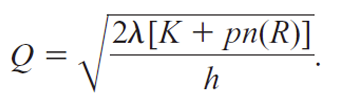

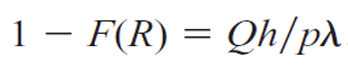

In [ ]:
#Initializing the problem formulation
#Q0 = EOQ = (2DK/h)**0.5
K = 131000
hpercentage = 0.1

D_L = [0]*7 #month demand value of raw material
for i in range(len(RML)):
  dailyDemandVal = np.mean(list(RMperDate_df[RML[i]]))
  D_L[i] = dailyDemandVal * 30

P_L = list(RMCost_df['Price (in wons)']) #price of raw material
for i in {0,1,2,4,6}:
  P_L[i] = P_L[i]/1000 #kg price to g price

H_L = [0]*7 #holding cost of raw material
for i in range (len(H_L)):
  H_L[i] = P_L[i]*hpercentage/12 #per month

Q0_L = [0]*7
for i in range (len(Q0_L)):
  Q0_L[i] = (2*D_L[i]*K/H_L[i])**0.5

print("D_L:", D_L)
print("P_L:", P_L)
print("H_L:", H_L)
print("Q0_L:", Q0_L)
print("Penalty_L:", Penalty_L)

D_L: [20778.947368421053, 12080.92105263158, 13512.088815789473, 363.61924342105266, 32401.38157894737, 7.282894736842106, 1018.9144736842105]
P_L: [3.948, 6.58, 2.632, 658, 6.58, 2632, 19.74]
H_L: [0.032900000000000006, 0.05483333333333334, 0.021933333333333336, 5.483333333333333, 0.05483333333333334, 21.933333333333334, 0.1645]
Q0_L: [406784.56732099154, 240258.26968954748, 401753.4101555188, 4168.230732146455, 393468.60560027545, 294.9513190258772, 40284.36852110824]
Penalty_L: [26.917601481963523, 13.672688244671393, 14.692050099042502, 2476.3043060883506, 23.3734276521541, 0, 8.675908776427754]


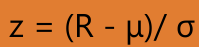

In [ ]:
#Calculating F(z), z, std, R, Lz, and nR

#Computing F_L and Z_L
import scipy.stats as st

Q_L = Q0_L.copy()
F_L = [0]*7

for i in range (7):
  F_L[i] = 1 - (Q_L[i]*H_L[i])/(Penalty_L[i]*D_L[i])

Z_L = st.norm.ppf(F_L)

print("F_L:", F_L)
print("Z_L:", Z_L)

#solve for R, need s and u, s calculated below, u is D_L
import statistics
Std_L = [0]*7

for i in range(len(RML)):
  L = list(RMperDate_df[RML[i]])
  Std_L[i] = statistics.stdev(L)

print("Std_L:",Std_L)

R_L = [0]*7
for i in range (7):
  R_L[i] = Z_L[i]*Std_L[i]+D_L[i]

print("R_L:", R_L)

#Solve for Lz (standardized loss function)
import math
def Lz(x): #defining the standardized loss function
  return math.exp(-(x**2)/2)/(math.sqrt(2*math.pi)) - x*(1-st.norm.cdf(x))

Lz_L = [0]*7

for i in range(7):
  Lz_L[i] = Lz(Z_L[i])

print("Lz_L:", Lz_L)

#solve for nR
nR_L = [0]*7
for i in range (7):
  nR_L[i] = Std_L[i]*Lz_L[i]

print("nR_L:", nR_L)

F_L: [0.9760723270475464, 0.9202429586918099, 0.9556126396546515, 0.9746168493599947, 0.9715115513713414, -inf, 0.2503651746020018]
Z_L: [ 1.97865071  1.4067077   1.70189677  1.95344996  1.90348801         nan
 -0.67334104]
Std_L: [312.13879150560086, 192.32911418814837, 185.760276132747, 5.184365904812698, 454.2880026029078, 0.11797409800555984, 10.26399506242397]
R_L: [21396.561010245696, 12351.471897797324, 13828.233630431097, 373.7466427872678, 33266.11334317473, nan, 1012.0033045757449]
Lz_L: [0.008988882613239546, 0.036129809384467554, 0.018203429088170034, 0.009610066095749423, 0.01095458585755621, nan, 0.8227825622930712]
nR_L: [2.805778955882299, 6.9488142347012944, 3.3814740139813444, 0.04982209900979979, 4.976536928571273, nan, 8.445036156824624]


<ipython-input-97-67326747d74c>:10: RuntimeWarning: divide by zero encountered in scalar divide
  F_L[i] = 1 - (Q_L[i]*H_L[i])/(Penalty_L[i]*D_L[i])


In [ ]:
#Repeating untill diff is between Qprev and Qnew is less than 1 unit

Qprev_L = Q_L.copy()
print("Q0:", Qprev_L)

Qnew_L = [0]*7

c = 1
for i in {0,1,2,3,4,6}:

  while True:
    Qnew_L[i] = ((2*D_L[i]*(K+Penalty_L[i]*nR_L[i]))/(H_L[i]))**0.5

    print("Iteration "+str(c)+":",Qnew_L)
    c+=1

    if abs(Qprev_L[i] - Qnew_L[i]) < 1:
      break

    F_L[i] = 1 - (Qnew_L[i]*H_L[i])/(Penalty_L[i]*D_L[i])
    Z_L = st.norm.ppf(F_L)
    Lz_L[i] = Lz(Z_L[i])
    nR_L[i] = Std_L[i]*Lz_L[i]

    Qprev_L[i] = Qnew_L[i]


Q0: [406784.56732099154, 240258.26968954748, 401753.4101555188, 4168.230732146455, 393468.60560027545, 294.9513190258772, 40284.36852110824]
Iteration 1: [406901.8112618133, 0, 0, 0, 0, 0, 0]
Iteration 2: [406901.84946442675, 0, 0, 0, 0, 0, 0]
Iteration 3: [406901.84946442675, 240345.3786727088, 0, 0, 0, 0, 0]
Iteration 4: [406901.84946442675, 240345.41615680425, 0, 0, 0, 0, 0]
Iteration 5: [406901.84946442675, 240345.41615680425, 401829.58394573006, 0, 0, 0, 0]
Iteration 6: [406901.84946442675, 240345.41615680425, 401829.6006193709, 0, 0, 0, 0]
Iteration 7: [406901.84946442675, 240345.41615680425, 401829.6006193709, 4170.193072233006, 0, 0, 0]
Iteration 8: [406901.84946442675, 240345.41615680425, 401829.6006193709, 4170.194118379276, 0, 0, 0]
Iteration 9: [406901.84946442675, 240345.41615680425, 401829.6006193709, 4170.194118379276, 393643.2529733382, 0, 0]
Iteration 10: [406901.84946442675, 240345.41615680425, 401829.6006193709, 4170.194118379276, 393643.34106762393, 0, 0]
Iteration 

In [ ]:
print("Starting Q:", Q0_L)
print("Final Q:", Qnew_L)

#Note: the final Q for Milk is 0 because the penalty was negative (set as 0), this means that the unit profit obtained from milk is negative
#Penalty estimations can be adjusted to fix this issue, however, we can take it now as the EOQ (Q0) = 295

Starting Q: [406784.56732099154, 240258.26968954748, 401753.4101555188, 4168.230732146455, 393468.60560027545, 294.9513190258772, 40284.36852110824]
Final Q: [406901.84946442675, 240345.41615680425, 401829.6006193709, 4170.194118379276, 393643.34106762393, 0, 40295.63924521012]


In [ ]:
print("Demand of each RM:",D_L)

Demand of each RM: [20778.947368421053, 12080.92105263158, 13512.088815789473, 363.61924342105266, 32401.38157894737, 7.282894736842106, 1018.9144736842105]


## **Analysis**

In [ ]:
D_L = np.array([20779, 12081, 13512, 364, 32401, 7.3, 1019])
Q_L = np.array([406902, 240345, 401830, 4170, 393643, 295, 40296])

Flast_L = F_L.copy()

Zlast_L = st.norm.ppf(Flast_L)

Rlast_L = [0]*7
for i in range (7):
  Rlast_L[i] = Zlast_L[i]*Std_L[i]+D_L[i]

Rlast_L[5] = D_L[5]

print("Reorder Quantity:", Rlast_L)

T_L = Q_L/D_L
print("T_L:",list(T_L))
#Note that the values of order time are very close to 20, 20, 30, 10, 10, 40, 40 months
#This is attractive because it would allow overlap in order time, reducing order cost
#Because these values are large, we are obliged to assume that the items are not perishable

MonthlyRMDemand_df = RMperDate_df.resample("M").sum()
MonthlyRMDemand_df.head()
MonthlyRMDemand_df.to_csv("MonthlyRMDemand.csv")

Reorder Quantity: [21396.57543370456, 12351.513354273095, 13828.128139419907, 374.1263529736011, 33265.643650383885, 7.3, 1012.0820644705574]
T_L: [19.582366812647383, 19.89446237894214, 29.73875074008289, 11.456043956043956, 12.14910033640937, 40.41095890410959, 39.54465161923454]


# **Cost Calculations**

In [ ]:
H_L = list(H_L) #monthly holding cost
Q_L = list(Q_L) #order quantity
Rlast_L = list(Rlast_L) #Reorder point
D_L = list(D_L) #monthly demand
T_L = list(T_L) #average cycle length
K = 131000
Penalty_L

#computing nR
Lzlast_L = [0]*7
for i in range(7):
  Lzlast_L[i] = Lz(Zlast_L[i])

nRlast_L = [0]*7
for i in range (7):
  nRlast_L[i] = Std_L[i]*Lzlast_L[i]
print("h:", H_L)
print("Q:", Q_L)
print("R:", Rlast_L)
print("Lambda:", D_L)
print("T:", T_L)
print("K:", K)
print("Penalty:", Penalty_L)
print("n(R):", nRlast_L)

h: [0.032900000000000006, 0.05483333333333334, 0.021933333333333336, 5.483333333333333, 0.05483333333333334, 21.933333333333334, 0.1645]
Q: [406902, 240345, 401830, 4170, 393643, 295, 40296]
R: [21396.57543370456, 12351.513354273095, 13828.128139419907, 374.1263529736011, 33265.643650383885, 7.3, 1012.0820644705574]
Lambda: [20779.0, 12081.0, 13512.0, 364.0, 32401.0, 7.3, 1019.0]
T: [19.582366812647383, 19.89446237894214, 29.73875074008289, 11.456043956043956, 12.14910033640937, 40.41095890410959, 39.54465161923454]
K: 131000
Penalty: [26.917601481963523, 13.672688244671393, 14.692050099042502, 2476.3043060883506, 23.3734276521541, 0, 8.675908776427754]
n(R): [2.806693319028886, 6.95180493941286, 3.3822142532239954, 0.04984866600293651, 4.9790477123426, nan, 8.450109210826886]


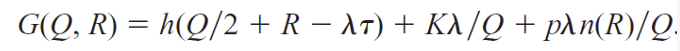

In [ ]:
#computing average cost per month
G_L = [0]*7
HoldingCosts = [0]*7
PenaltyCosts = [0]*7
for i in range (7):
  HoldingCosts[i] = H_L[i]*((Q_L[i]/2)+Rlast_L[i]-D_L[i]) * 20 #months
  PenaltyCosts[i] = Penalty_L[i]*D_L[i]*nRlast_L[i]/Q_L[i] * 20 #months

  G_L[i] = HoldingCosts[i]+PenaltyCosts[i]

PenaltyCosts[5] = 0 # milk penalty cost is 0
G_L[5] = HoldingCosts[5]

print("Holding Costs:", HoldingCosts)
print("Penalty Costs:", PenaltyCosts)
print("Total cost:", G_L)

Holding Costs: [134277.12263537763, 132085.83797851953, 88273.38821049221, 229765.52337610495, 216795.80420325435, 64703.33333333333, 66264.15999210814]
Penalty Costs: [77.16069560592135, 95.55408923738192, 33.41879535449784, 215.50278045277082, 191.58194147478434, 0, 37.0782766629947]
Total cost: [134354.28333098354, 132181.3920677569, 88306.80700584671, 229981.02615655772, 216987.38614472913, 64703.33333333333, 66301.23826877114]


In [ ]:
sum(G_L)

932815.4663079784